In [2]:
import os
import os.path as osp
from glob import glob
from tqdm import tqdm
import time
import numpy as np

import cv2
from PIL import Image
from IPython.display import display

## Blend two images within masked region

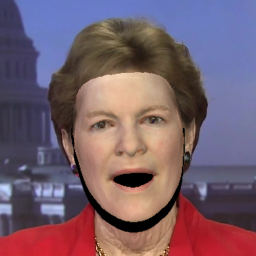

In [11]:
src_img_path = "/home/zhanghm/Research/Github/pix2pixHD/datasets/HDTF_face3dmmformer/train/WDA_ChrisVanHollen1_000/face_image/000000.jpg"
face_mask_path = "/home/zhanghm/Research/Github/pix2pixHD/datasets/HDTF_face3dmmformer/train/WDA_ChrisVanHollen1_000/face_mask_512/000000.png"
face_3dmm_image_path = "/home/zhanghm/Research/Github/pix2pixHD/datasets/HDTF_face3dmmformer/train/WDA_ChrisVanHollen1_000/deep3dface_512/000000.png"

src_img_path = "/home/zhanghm/Research/Face/PIRender/dataset/HDTF_face3dmmformer/train/WDA_CarolynMaloney1_000/face_image/000000.jpg"
face_mask_path = "/home/zhanghm/Research/Face/PIRender/temp_results/000000.png"
face_3dmm_image_path = "/home/zhanghm/Research/Face/PIRender/dataset/HDTF_face3dmmformer/train/WDA_CarolynMaloney1_000/deep3dface_512/000000.png"

src_img_path = "/home/zhanghm/Research/Face/PIRender/dataset/HDTF_face3dmmformer/train/WDA_JeanneShaheen0_000/face_image/000335.jpg"
face_mask_path = "/home/zhanghm/Research/Face/PIRender/temp_results/000335.png"
face_mask_path = "./temp_results/000335.png"
face_mask_path = "./000335_final.png"
face_3dmm_image_path = "/home/zhanghm/Research/Face/PIRender/dataset/HDTF_face3dmmformer/train/WDA_JeanneShaheen0_000/deep3dface_512/000335.png"

src_img = cv2.imread(src_img_path)
face_mask = cv2.imread(face_mask_path)
face_3dmm_image = cv2.imread(face_3dmm_image_path)

blended_image = (src_img.astype(np.float32) / 255.0) * (1.0 - face_mask.astype(np.float32) / 255.0) + \
                (face_3dmm_image.astype(np.float32) / 255.0) * face_mask.astype(np.float32) / 255.0
blended_image = (blended_image * 255.0).astype(np.uint8)

cv2.imwrite("blended_image.jpg", blended_image)
blended_image = cv2.resize(blended_image, (256, 256))
display(Image.fromarray(blended_image[..., ::-1]))

## Blend two images in a small region

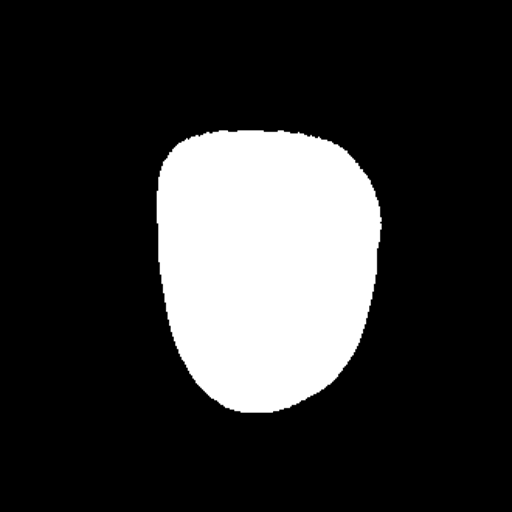

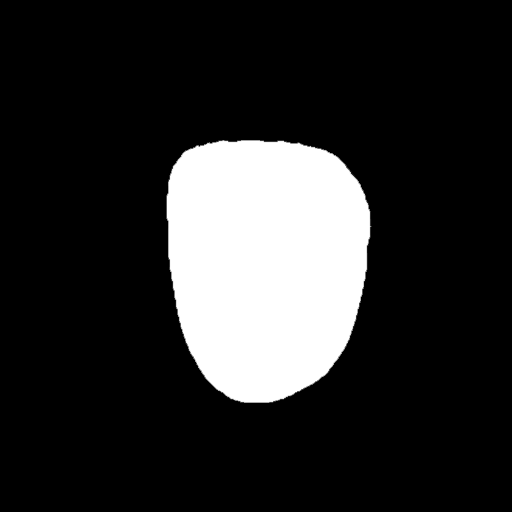

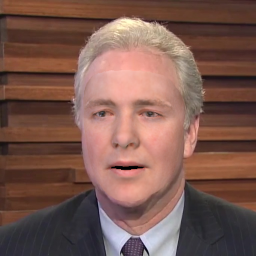

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21))

face_mask_erode = cv2.erode(face_mask, kernel=kernel, iterations=1)
# face_mask_erode = cv2.dilate(face_mask, kernel=kernel, iterations=1)

display(Image.fromarray(face_mask[..., ::-1]))
display(Image.fromarray(face_mask_erode[..., ::-1]))

blended_image = (src_img.astype(np.float32) / 255.0) * (1.0 - face_mask_erode.astype(np.float32) / 255.0) + \
                (face_3dmm_image.astype(np.float32) / 255.0) * face_mask_erode.astype(np.float32) / 255.0
blended_image = (blended_image * 255.0).astype(np.uint8)

blended_image = cv2.resize(blended_image, (256, 256))
display(Image.fromarray(blended_image[..., ::-1]))